In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [18]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [19]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))
        except ZeroDivisionError:
            print('Zero Division')
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

In [20]:
def GetRoots(f,df,x,tolerancia = 10):
    Roots = np.array([])
    for i in x:
        root = GetNewton(f,df,i)
        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append(Roots, croot)
    Roots.sort()
    return Roots

In [21]:
def GetLaguerre(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1-x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
    return sym.expand(poly,x)

In [22]:
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [23]:
def GetAllRootsGLag (n):
    xn = np.linspace(0,(n)+((n-1)*np.sqrt(n)),400)
    
    Laguerre = GetLaguerre(n,x)
    DLaguerre = GetDLaguerre(n,x)
        
    poly = sym.lambdify([x],Laguerre,'numpy')
    Dpoly = sym.lambdify([x],DLaguerre,'numpy')
    
    Roots = GetRoots(poly,Dpoly,xn)
    
    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
        
    return Roots

In [24]:
def GetWeightsGLag(n):
    Roots = GetAllRootsGLag(n)
    Laguerre = GetLaguerre(n+1,x)
    poly = sym.lambdify([x],Laguerre,'numpy')
    Weights = Roots/(((n+1)**2)*(poly(Roots)**2))
    return Weights

In [25]:
n = 3
Weights = GetWeightsGLag(n)
Zeros = GetAllRootsGLag(n)
f = lambda x: (x**3)/(-np.exp(-x)+1)
Ic = np.sum(f(Zeros)*Weights)
Ic

6.481130171427755

In [26]:
Ie = np.pi**4 / 15
Ie

6.493939402266828

In [27]:
def Error_Relativo(n):
    Weights = GetWeightsGLag(n)
    Zeros = GetAllRootsGLag(n)
    return np.abs(np.sum(f(Zeros)*Weights)/Ie)

In [28]:
n = np.linspace(2, 10, 9)

In [29]:
ErrorR = np.array([])
for i in range(2, 11):
    ErrorR = np.append(ErrorR, Error_Relativo(i))

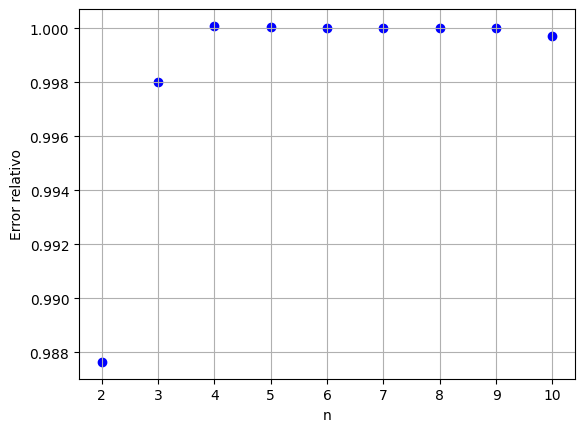

In [30]:
plt.scatter(n, ErrorR, color = 'b')
plt.xlabel('n')
plt.ylabel('Error relativo')
plt.grid()